<a href="https://colab.research.google.com/github/Areliortiz/SIMULACION2/blob/main/Serpiente_escaleras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Serpientes y escaleras
![texto del vínculo](https://drive.google.com/uc?id=1-cqd28wmsE4cwPHO89PCsUsY53-aSfDy)

¿Cuál es, en promedio, el número de tiradas necesarias para terminar el juego? Considerar que cada tirada se hace con un dado ordinario.


Responder: \\
a) Analíticamente. \\
b) Por simulación.

Matriz de transicion: \\
![texto alternativo](https://drive.google.com/uc?id=1DcqF-4egqNb81NgonT4TGUhYVYSWzwMB)



Donde: \\
Serpientes: \\
Desde la casilla 13 hasta la 4. \\
Desde la casilla 17 hasta la 10. \\

Escaleras: \\
Desde la casilla 3 hasta la 11. \\
Desde la casilla 15 hasta la 19. \\

La matriz de transición tiene estados absorbentes, que en este caso es la casilla 20. \\


La matriz de transición
$t$ puede escribirse en bloques, separando los estados absorbentes de los estados transitorios:

$$ P=  [ \begin{matrix}
N & A\\
0 & I
\end{matrix} ] $$
Donde: \\
I: Matriz Identidad \\
0: Matriz Nula \\
N: Matriz No Absorbente \\
A: Matriz Absorbente \\

El valor esperado se calcula como: \\
V_esp=$(I−N)^{-1} $ \\

Para calcular el tiempo esperado de absorción desde cualquier estado inicial usaremos la sig. formula \\

$t_i = \sum_j$ V_esp$[i,j]$ \\
Por lo que , el valor de $t_1$ será el número esperado de tiradas  necesarias para llegar desde la casilla 1 hasta la casilla 20.


In [46]:
import random as rnd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
# Numero de casillas totales del tablero
casillas=20

# Creamos nuestra matriz de transición
t = np.array([
    [0, 1/6, 0, 1/6, 1/6, 1/6, 1/6, 0, 0, 0, 1/6, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 1/6, 1/6, 1/6, 1/6, 1/6, 0, 0, 1/6, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 1/6, 1/6, 1/6, 1/6, 1/6, 1/6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 1/6, 1/6, 1/6, 1/6, 1/6, 1/6, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 1/6, 1/6, 1/6, 1/6, 1/6, 1/6, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 1/6, 0, 0, 0, 1/6, 1/6, 1/6, 1/6, 1/6, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 1/6, 0, 0, 0, 0, 1/6, 1/6, 1/6, 1/6, 0, 1/6, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 1/6, 0, 0, 0, 0, 0, 1/6, 1/6, 1/6, 0, 1/6, 0, 0, 0, 0, 1/6, 0],
    [0, 0, 0, 1/6, 0, 0, 0, 0, 0, 0, 1/6, 1/6, 0, 1/6, 0, 1/6, 0, 0, 1/6, 0],
    [0, 0, 0, 1/6, 0, 0, 0, 0, 0, 1/6, 0, 1/6, 0, 1/6, 0, 1/6, 0, 0, 1/6, 0],
    [0, 0, 0, 1/6, 0, 0, 0, 0, 0, 1/6, 0, 0, 0, 1/6, 0, 1/6, 0, 1/6, 1/6, 0],
    [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1/6, 0, 0, 0, 0, 0, 1/6, 0, 1/6, 1/3, 1/6],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1/6, 0, 0, 0, 0, 0, 0, 0, 1/6, 1/6, 1/2],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1/6, 5/6],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
])
#Matriz no absobente
N = t[:-1, :-1]

#M matriz identidad
I = np.eye(casillas - 1)

# Calculamos la matriz fundamental casillas = (I - t)^-1
N_matrix = np.linalg.inv(I - N)
#representa la matriz de transición
df = pd.DataFrame(t)

# Calculamos el tiempo esperado de absorción
t = np.sum(N_matrix[0, :])

# Imprimimos la matriz de transición y el tiempo esperado
print(f"\nPromedio del número de tiradas necesarias para terminar el juegos: {round(t, 2)}")


Promedio del número de tiradas necesarias para terminar el juegos: 6.9


In [42]:
def serpientes_escaleras():
   Posicion=1
   Tiradas=0
   Dado=0

   while Posicion <= 20:
       Dado = rnd.randint(1, 6) # lanza el dado
       Posicion += Dado

       if Posicion == 3:
          Posicion=11

       elif Posicion == 15:
          Posicion=19

       elif Posicion ==13:
          Posicion=4

       elif Posicion == 17:
          Posicion= 10

       Tiradas+= 1

   return Tiradas

In [50]:

def simulacion(num_simulacion):
  total_tiradas = 0
  lista_tiradas = []
  for _ in range(num_simulacion):
     lista_tiradas.append(serpientes_escaleras())
     total_tiradas += serpientes_escaleras()

  promedio= total_tiradas / num_simulacion
  return promedio,lista_tiradas



Promedio del número de tiradas necesarias para terminar el juegos: 7.15
Lista de tiradas: [4, 8, 4, 11, 5, 4, 4, 5, 6, 5, 6, 6, 8, 7, 7, 5, 6, 5, 4, 7, 8, 15, 5, 15, 5, 5, 5, 6, 6, 8, 12, 8, 7, 9, 3, 7, 5, 14, 4, 4, 7, 9, 16, 9, 8, 6, 8, 5, 4, 3, 11, 7, 15, 9, 14, 13, 4, 6, 5, 10, 5, 4, 8, 6, 7, 5, 5, 9, 5, 8, 7, 7, 11, 6, 7, 9, 10, 6, 6, 7, 5, 8, 7, 7, 8, 4, 5, 4, 6, 14, 7, 4, 6, 5, 4, 5, 6, 4, 5, 3, 5, 4, 8, 5, 7, 6, 5, 11, 6, 4, 7, 5, 7, 11, 13, 5, 9, 18, 4, 7, 9, 6, 7, 6, 6, 6, 6, 9, 5, 5, 10, 9, 4, 19, 6, 6, 11, 4, 9, 10, 4, 4, 5, 5, 4, 8, 4, 8, 4, 7, 12, 4, 6, 10, 5, 10, 6, 6, 13, 9, 4, 5, 10, 4, 7, 5, 5, 6, 5, 6, 6, 14, 7, 9, 5, 7, 5, 12, 7, 5, 9, 6, 7, 8, 5, 6, 4, 16, 6, 7, 13, 6, 5, 6, 6, 5, 13, 9, 7, 10, 5, 5, 4, 7, 9, 7, 5, 7, 5, 4, 3, 7, 4, 7, 5, 9, 6, 7, 5, 4, 5, 11, 17, 11, 3, 5, 6, 8, 7, 11, 6, 7, 5, 5, 3, 7, 6, 8, 7, 7, 14, 5, 6, 9, 6, 10, 11, 6, 12, 4, 7, 7, 9, 5, 7, 15, 7, 5, 9, 6, 6, 4, 9, 5, 5, 5, 4, 6, 10, 8, 6, 6, 7, 9, 7, 8, 13, 18, 3, 8, 5, 7, 6, 8, 5, 16, 5, 10

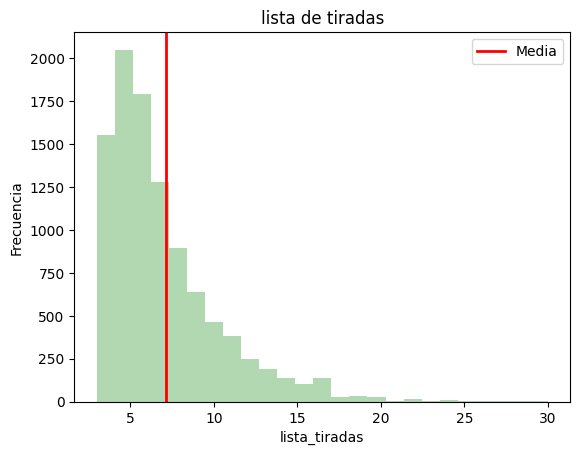

In [59]:
num_simulacion=10000
promedio,lista_tiradas = simulacion(num_simulacion)
print(f"Promedio del número de tiradas necesarias para terminar el juegos: {round(promedio, 2)}")
print(f"Lista de tiradas: {lista_tiradas}")
plt.hist(lista_tiradas, bins=25, color='green', alpha=0.3)
plt.title('lista de tiradas')
plt.axvline(np.mean(lista_tiradas), color='red', linestyle='-', linewidth=2, label='Media')
plt.xlabel('lista_tiradas')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()
